# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [ ]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

In [ ]:
df_titanic = df_titanic[df_titanic["type"] == "passenger"]

df_titanic_class_embark = pd.crosstab(df_titanic["class"], df_titanic["embarked"])
df_titanic_class_embark

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [ ]:
df_titanic_class_embark = pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize = True)
df_titanic_class_embark

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


In [ ]:
df_titanic_class_embark = pd.crosstab(df_titanic["embarked"], df_titanic["class"], normalize = True)
df_titanic_class_embark

class,1st,2nd,3rd
embarked,,,
B,0.002278,0.004556,0.000000
C,0.108580,0.019742,0.077449
Q,0.002278,0.005315,0.085801
S,0.132878,0.186029,0.375095


In [ ]:
df_titanic_class_embark.loc["S", "3rd"]/np.sum(df_titanic_class_embark.loc[:,"3rd"])

np.float64(0.6967559943582511)

In [ ]:
df_titanic_class_embark.loc["S", "3rd"]/np.sum(df_titanic_class_embark.loc["S",:])

np.float64(0.5404814004376367)

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

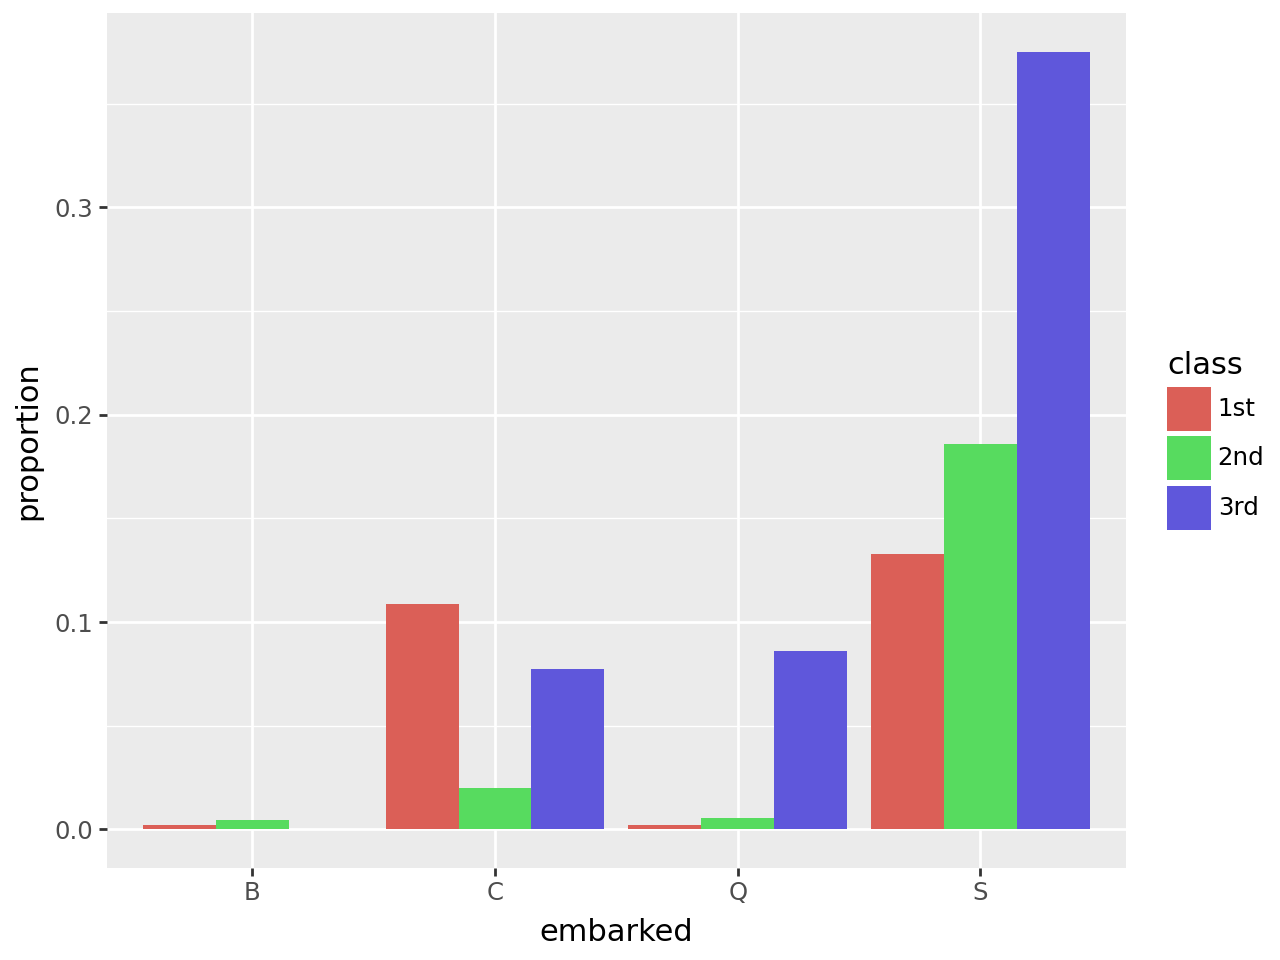

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar

df_long = df_titanic_class_embark.reset_index().melt(
    id_vars="embarked",
    var_name="class",
    value_name="proportion"
)

(
    ggplot(df_long, aes(x="embarked", y="proportion", fill="class"))
    + geom_bar(stat="identity", position="dodge")
)
#I had ChatGPT help me with reformatting my data so it could be used in the graph
